In [ ]:
!git clone https://github.com/AshishJangra27/datasets


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
df = pd.read_csv('/content/datasets/Job Postings/jobs.csv.zip')

###1) Data Exporation


####1.1)checking null values

In [ ]:
df.isnull().sum()

,0
job_id,480
job_role,480
company,481
experience,1749
salary,480
location,1706
rating,36199
reviews,36199
resposibilities,500
posted_on,480


####1.2)checking duplicates

In [ ]:
df.duplicated(subset = 'job_id').sum()

np.int64(6137)

####1.3)Reading Columns

In [ ]:
del df['posted_on']
del df['job_link']
del df['company_link']

###2 Data cleaning

####2.1)Dealing with null Values

- Remove rows with null values except rating & reviews


- deal with rating and reviewa sepperately



In [ ]:
df.isnull().sum()
df = df.dropna(subset = ['job_id','resposibilities','company'])

df['experience'] = df['experience'].fillna('5-10yrs')
df['location'] = df['location'].fillna('Bangalore/Bengaluru')
df['rating']  = df['rating'].fillna(0.0)
df['reviews'] = df['reviews'].fillna('0 Reviews')


####2.2)Dealing with Null Values

In [ ]:

df = df.drop_duplicates(subset = 'job_id')

####2.3)Change the datatype of job_id

In [ ]:
df['job_id'] = df['job_id'].astype('int').astype(str)

####2.4)Clean Experience column

In [ ]:
df['min_experience'] = df['experience'].str.replace('Yrs','').str.split('_').str[0]
df['max_experience'] = df['experience'].str.replace('Yrs','').str.split('_').str[1]

####2.5)Clean salary Column

In [ ]:
df['clean_salary'] = df['salary'].str.replace(' PA.','').str.replace(',','').str.split('-').str[0].str.strip()

df = df[(df['clean_salary'] != '9.5 Cr and above') & (df['clean_salary'] != 'Less than 5000') &  (df['clean_salary'] != 'Less than 50000')]
df['min_salary'] = df['clean_salary'].str.split('(').str[0].str.strip()
del df['clean_salary']


df['clean_salary'] = df['salary'].str.replace(' PA.','').str.replace(',','').str.split('-').str[1].str.split('(').str[0].str.strip()
df = df[df['clean_salary'] != '9.5 Cr and above']
df['max_salary'] = df['clean_salary'].fillna('Not disclosed')
del df['clean_salary']

del df['salary']
del df['experience']


####2.7)Clean review columns

In [ ]:
df['reviews'] = df['reviews'].str.split(' ').str[0].astype('int')

###3 Data Analysis

####3.1)overall Analysis

- General insights such as job distribution by country, job levels, and company types were observed to understand the broader job market landscapre.

In [ ]:
print('-'*30)
print('Total Jobs  : ', len(df))
print('Total Companies :', df['company'].nunique())

------------------------------
Total Jobs  :  72967
Total Companies : 15310


####Top 5 Companies

- The top five companies with the highest number of jobs posting were identified, reveraling major recruiters and market leaders

In [ ]:
df.groupby('company')['reviews'].count().sort_values(ascending=False).head()

,reviews
company,
Lavya Associates,5128
Accenture,2928
Hucon,852
Varite India Pvt. Ltd.,815
IBM,656


In [ ]:
import plotly.express as px
top_reviews = df.groupby('company')['reviews'].count().sort_values(ascending=False).head().reset_index()
top_reviews.columns = ['company', 'review_count']

fig = px.pie(
    top_reviews,
    names='company',
    values='review_count',
    title='Top 5 Companies by Number of Reviews',
    color_discrete_sequence=px.colors.sequential.Purples
)
fig.update_layout(
    paper_bgcolor='#aeb1b5',
    plot_bgcolor='#aeb1b5',
    font_color='black',
    title_font_color='black'
)
fig.show()

#### Based on JobID

In [ ]:
df.groupby('company')['job_id'].count().sort_values(ascending = False).head()


,job_id
company,
Lavya Associates,5128
Accenture,2928
Hucon,852
Varite India Pvt. Ltd.,815
IBM,656


####Based on Reating

In [ ]:
df.groupby('company')['rating'].count().sort_values(ascending = False).head()

,rating
company,
Lavya Associates,5128
Accenture,2928
Hucon,852
Varite India Pvt. Ltd.,815
IBM,656


####Based on the Maximum Salary

In [ ]:
df.groupby('company')['max_salary'].count().sort_values(ascending= False).head()

,max_salary
company,
Lavya Associates,5128
Accenture,2928
Hucon,852
Varite India Pvt. Ltd.,815
IBM,656


####Top 10 companies ny Minimum Reviews

In [ ]:
df.groupby('company')['reviews'].min().sort_values(ascending=False).head(10)

,reviews
company,
Tata Consultancy Services (TCS),50163
Reliance Industries (RIL),43672
Hdfc Bank,39110
Icici Bank,33480
Accenture,32129
L & T Infrastructure Engineering Limited,24041
Larsen & Toubro (L&T),24041
L&T Infrastructure Engineering Limited,24041
L&T Technology Services,24022


In [ ]:
import pandas as pd
import plotly.express as px

company_reviews = df.groupby('company')['reviews'].min().sort_values(ascending=False).head(10)

company_reviews = company_reviews.reset_index()

fig = px.pie(
    company_reviews,
    names='company',
    values='reviews',
    title='Top 10 Companies by Minimum Reviews (Descending)',
    color_discrete_sequence=px.colors.sequential.Blues
)

fig.show()


####Companies Hiring Data Analyst
- A focused analysis filtered job listings with the title “Data Analyst” to find which companies are actively hiring for this specific role.

In [ ]:
data_analyst_companies = df[df['job_role'] == 'Data Analyst']['company'].unique()

print(f"Total companies hiring Data Analysts: {len(data_analyst_companies)}")
print(data_analyst_companies)

Total companies hiring Data Analysts: 53
['Publicis Groupe' 'Omniactive Health Technologies' 'Quickxpert Infotech'
 'GlobalLogic' 'Target' 'Hackerearth' 'Cointab Software'
 'Control Risks India Pvt Ltd.' 'Axis My India Ltd.' 'Instinox Llp'
 'Goldenpi Technologies' 'Kaleidofin' 'Dronebase' 'LKQ India'
 'Nichepro Technologies Pvt.ltd.' 'Onit' 'CliqHR Recruitment Services'
 'Quess It Staffing' 'Ergode It Services' 'Shell' 'Maruti Suzuki'
 'Arcadia' 'S&P Global Inc.' 'PubMatic' 'Radical Technologies'
 '24dimensions' 'Vashi Integrated Solutions' 'Pragmath'
 'Redwind Technology' 'Futures First' 'Webhelp India'
 'Feathersoft Info Solutions' 'Lemniscate Technologies' 'Webhelp'
 'Bluebox Infosoft' 'Transunion' 'Forwood Safety'
 'Rewise Analytics & Technologies' 'Varite India Pvt. Ltd.'
 'NatWest Markets' 'Smartanalyst India Pvt Ltd' 'RAVR INDUSTRIES PVT LTD'
 'Prohub Technologies' 'Megma Services' 'Thirstycrew Solutions'
 'Express Roadways' 'Alpha Orion' 'Sun Consultants'
 'Talchemy Solutions L

In [ ]:
analyst_jobs = df[df['job_role'].str.contains('data analyst', case=False, na=False)]
analyst_companies_df = analyst_jobs[['company']].drop_duplicates()
print(analyst_companies_df)

                             company
78                   Publicis Groupe
173                    Tech Mahindra
263                            Croma
844                           Jacobs
1973                        Flipkart
...                              ...
66629                People Staffing
67446                 NMS Consultant
70622              Venus Consultancy
70833          Corporate Destination
71985  GenNext India Private Limited

[137 rows x 1 columns]


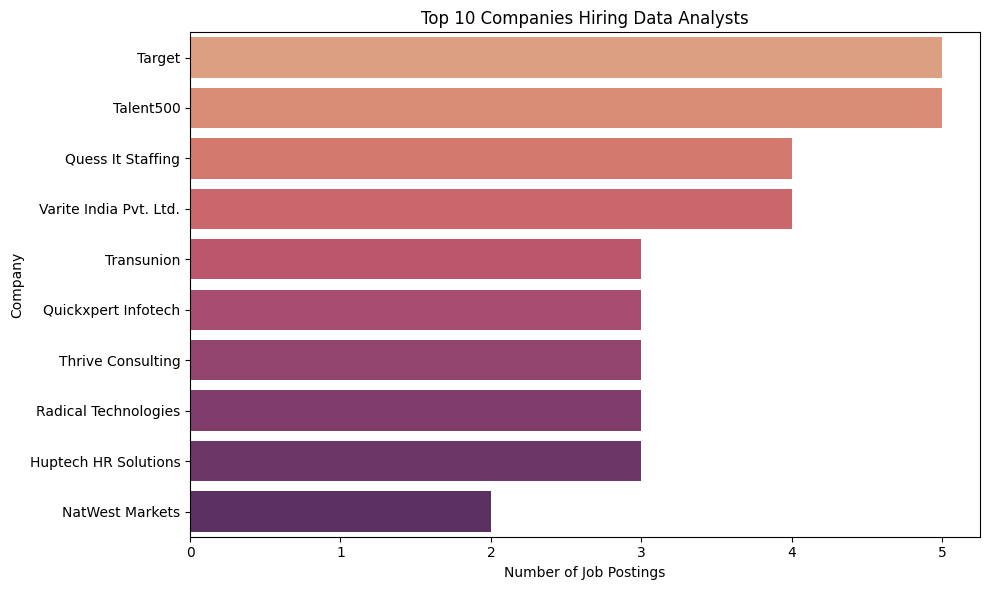

In [ ]:
analyst_jobs = df[df['job_role'].str.contains('data analyst', case=False, na=False)]
company_counts = analyst_jobs['company'].value_counts().head(10)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x=company_counts.values, y=company_counts.index, palette='flare')
plt.title('Top 10 Companies Hiring Data Analysts')
plt.xlabel('Number of Job Postings')
plt.ylabel('Company')
plt.tight_layout()
plt.show()

####Skills needed for almost all jobs
- Frequently occurring skills across all job listings were extracted using keyword analysis, indicating core skills consistently in demand.

In [ ]:
df['resposibilities'].str.lower().str.split(',').explode().value_counts().head(10)

,count
resposibilities,
sales,5851
communication,3482
agency,3450
tied,3310
customer service,3276
training,3177
team handling,2617
javascript,2607
agency channel,2549


In [ ]:
import plotly.express as px

top_responsibilities = (
    df['resposibilities']
    .str.lower()
    .str.split(',')
    .explode()
    .str.strip()
    .value_counts()
    .head(10)
    .reset_index()
)
top_responsibilities.columns = ['responsibility', 'count']

fig = px.bar(
    top_responsibilities,
    x='count',
    y='responsibility',
    orientation='h',
    title='Top 10 Job Responsibilities',
    color='responsibility',
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig.update_layout(
    paper_bgcolor='#f0f0f0',
    plot_bgcolor='#f0f0f0',
    font_color='black',
    title_font_size=20,
    yaxis=dict(categoryorder='total ascending')
)

fig.show()

####Skills to get hired for in HDFC Bank
- Jobs listed under HDFC Bank were analyzed to determine the most common skills required, helping tailor applications for this company.

In [ ]:
hdfc_jobs = df[df['company'].str.contains('Hdfc Bank', case=False, na=False)]

hdfc_skills = (
    hdfc_jobs['resposibilities']
    .dropna()
    .str.lower()
    .str.split(',')
    .explode()
    .str.strip()
    .value_counts()
    .head(10)
    .reset_index()
)
hdfc_skills.columns = ['skill', 'count']

fig = px.bar(
    hdfc_skills,
    x='skill',
    y='count',
    title='Top 10 Skills Required at HDFC Bank',
    color='count',
    color_continuous_scale=px.colors.sequential.Greens
)

fig.update_layout(
    paper_bgcolor='#abc2c4',
    plot_bgcolor='#abc2c4',
    font_color='black',
    title_font_size=20
)

fig.show()

###No. of Jobs as per the years of experience
 - Jobs were grouped by required experience levels to visualize the availability of roles across various experience brackets, aiding entry-level and senior applicants

In [ ]:
df['min_experience'].value_counts()

,count
min_experience,
5-10,7483
3-8,3912
2-7,3057
1-6,3014
4-9,2916
...,...
20-26,1
22-28,1
19-24,1


In [ ]:
import plotly.express as px

experience_counts = df['min_experience'].value_counts().reset_index()
experience_counts.columns = ['min_experience', 'number_of_jobs']

fig = px.bar(experience_counts,
             x='min_experience',  # Use 'min_experience' here
             y='number_of_jobs',
             title='Number of Jobs by Minimum Experience',
             labels={'min_experience': 'Minimum Experience (Years)', 'number_of_jobs': 'Number of Jobs'},
             color='min_experience')

fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()